In [1]:
import pandas as pd

import os
import shutil
import glob

import json

import numpy as np
from PIL import Image
from PIL import Image
import requests
from io import BytesIO
import requests
from urllib.parse import urlencode
import re

import requests

In [2]:
INPUT_EXCEL = f"/home/jjjj/Downloads/Картинки .xlsx"
OUT_PATH = "IMGS_1_11"

In [3]:
xl = pd.ExcelFile(INPUT_EXCEL)
data = xl.parse(xl.sheet_names[0])
data

,id,external_id,name,Картинка,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,icon
0,68,f354478aa85477dac9d9097b6a3b3648724b79bd,Roulette,https://disk.yandex.ru/i/XwBDvLcRuy2J-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/f354478aa85477dac...
1,69,cb2d3bc6e2ce0532610c97b412723ac9a57337ac,Blackjack,https://disk.yandex.ru/i/GVzRIzgi2lTXjw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/cb2d3bc6e2ce05326...
2,70,2d590c3c6f239c2babde26d25d298957d556f93c,Baccarat,https://disk.yandex.ru/i/LA_S2tFTTZs8FA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/2d590c3c6f239c2ba...
3,71,5b7d61206828c23ef9ebf51e4b21f8a657ebfd3f,Sic-Bo,https://disk.yandex.ru/i/YJDeUwFAuj6BZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/5b7d61206828c23ef...
4,77,87c5f36aee08189eab9e6fcbd63c3c16f0f46464,Baccarat,https://disk.yandex.ru/i/dc__L7Z9RII5sw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/Vivogaming/87c5f3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,10761,548744de4b5d424c963ce6acc743c33a,Prive Lounge Blackjack 3 Mobile,https://disk.yandex.ru/i/yq-7p4rWJshwAg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/08f21347a26c7f964...
329,10762,383afe8a1c284802a0c1f717e803361f,Prive Lounge Blackjack 4,https://disk.yandex.ru/i/D647427Q4oQpvQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/08f21347a26c7f964...
330,10763,877e088f900f4dc78af0b8f3ad63742c,Prive Lounge Blackjack 4 Mobile,https://disk.yandex.ru/i/fiyujKi0xuAIiw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/08f21347a26c7f964...
331,10764,008c40e402394fa1a8aaf4215a34cd1f,Prive Lounge Blackjack 5,https://disk.yandex.ru/i/bxzeYl5pao3_bg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/08f21347a26c7f964...


In [4]:
def yandex_download(url):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    public_key = url  # Сюда вписываете вашу ссылку
    
    # Получаем загрузочную ссылку
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    
    # Загружаем файл и сохраняем его
    download_response = requests.get(download_url)
    img = Image.open(BytesIO(download_response.content))
    return img


def other_download(url):
    return Image.open(BytesIO(requests.get(url).content))

In [7]:
bad_imgs = []
col = 0
for i in range(len(data)):
    i = data.loc[i]
    name = i["external_id"]
    yandex_img = i["Картинка"]
    icon_img = i["icon"]
    
    if isinstance(yandex_img, str):
        yandex_download(yandex_img).save(os.path.join(OUT_PATH, name + "_yandex.png"))
        col += 1
    if isinstance(icon_img, str):
        other_download(icon_img).save(os.path.join(OUT_PATH, name + "_icon.png"))
        col += 1

In [8]:
col

573

In [4]:
data

,id,external_id,name,Картинка,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,icon
0,68,f354478aa85477dac9d9097b6a3b3648724b79bd,Roulette,https://disk.yandex.ru/i/XwBDvLcRuy2J-g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/f354478aa85477dac...
1,69,cb2d3bc6e2ce0532610c97b412723ac9a57337ac,Blackjack,https://disk.yandex.ru/i/GVzRIzgi2lTXjw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/cb2d3bc6e2ce05326...
2,70,2d590c3c6f239c2babde26d25d298957d556f93c,Baccarat,https://disk.yandex.ru/i/LA_S2tFTTZs8FA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/2d590c3c6f239c2ba...
3,71,5b7d61206828c23ef9ebf51e4b21f8a657ebfd3f,Sic-Bo,https://disk.yandex.ru/i/YJDeUwFAuj6BZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/5b7d61206828c23ef...
4,77,87c5f36aee08189eab9e6fcbd63c3c16f0f46464,Baccarat,https://disk.yandex.ru/i/dc__L7Z9RII5sw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/Vivogaming/87c5f3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,10761,548744de4b5d424c963ce6acc743c33a,Prive Lounge Blackjack 3 Mobile,https://disk.yandex.ru/i/yq-7p4rWJshwAg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/08f21347a26c7f964...
329,10762,383afe8a1c284802a0c1f717e803361f,Prive Lounge Blackjack 4,https://disk.yandex.ru/i/D647427Q4oQpvQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/08f21347a26c7f964...
330,10763,877e088f900f4dc78af0b8f3ad63742c,Prive Lounge Blackjack 4 Mobile,https://disk.yandex.ru/i/fiyujKi0xuAIiw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/08f21347a26c7f964...
331,10764,008c40e402394fa1a8aaf4215a34cd1f,Prive Lounge Blackjack 5,https://disk.yandex.ru/i/bxzeYl5pao3_bg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/08f21347a26c7f964...


In [24]:
INPUT_FOLDER = r"WITHOUT_TEXT"
OUT_DIR = r"RESULT"

In [25]:
for i in os.listdir(INPUT_FOLDER):
    if not i.endswith(".png"):
        continue
    token = i.split("_")[0]
    name = data[data["external_id"] == token]['name'].item()
    out_dir = os.path.join(OUT_DIR, name)
    os.makedirs(out_dir, exist_ok=True)
    shutil.copy(os.path.join(INPUT_FOLDER, i), os.path.join(out_dir, i))

In [22]:
token

'a.zip'

In [16]:
name.item()

'Blackjack 51 - Ruby Mobile'

In [10]:
data[data["external_id"] == a]

,id,external_id,name,Картинка,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,icon
289,8264,2cfad95d4de44edd1fd013ee5a6ba3caca614077,Roleta da Sorte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://gis-static.com/games/3962be5e18b1e84fd...


In [9]:
a = r"/home/jjjj/Documents/gallery_view/IMGS_1_11/9a153e38da5947159bc3a2e7478f4da6_icon.png"
a

'/home/jjjj/Documents/gallery_view/IMGS_1_11/9a153e38da5947159bc3a2e7478f4da6_icon.png'

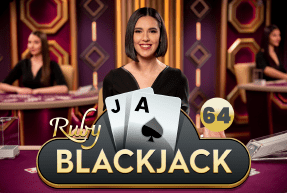

In [11]:
Image.open(a).convert("RGB")

ValueError: Could not save to JPEG for display

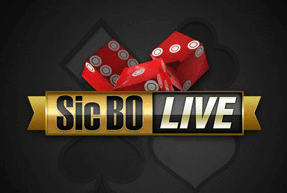

In [38]:
other_download(data["icon"][3])

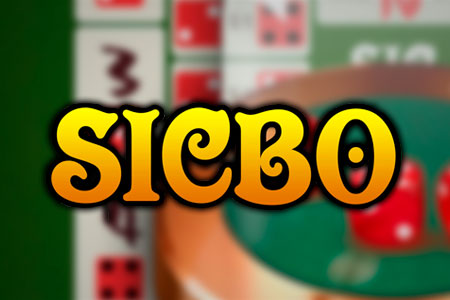

In [39]:
yandex_download(data["Картинка"][3])

In [29]:
a = data["icon"][0]
requests.get(a).text

'�PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x1f\x00\x00\x00�\x08\x03\x00\x00\x00��D�\x00\x00\x03\x00PLTE\x00\x00\x00���\x04\x04\x07\t\x07\x08\n\n\x0b\x11\x10\x13\x0e\x0c\x0f\x16\x14\x16 \x1e"758.,/\x1c\x1b\x1d*(*\x18\x16\x1aZX[203ECF><@���_]`RPSMKN$#$JHJ\t\x04\x02usvgei������\x0f\n\x08pnpC@AUTV�����������������̡��{x{���������<9;\x17\x13\x10\x7f}\x7f���\'#)\x12\x10\x0c������������\x1c\x1a\x16%\x1f\x1a���ljl��\u244f�cad���\x18\x0c\t\x12\x04\x03��߈��ڻ��\x04\x05�ǥ�Φ-$\x1f\x1f\x14\x0e5+%�\x05\x07��($\x18\x15������Ե���}��oͯ���c��,����ӫ\u05f8�߿�ڻ���u��+\x08\x05\x0f�]:2\x1e\x15�\x1e\x11��y=5+ \t\x05�xR�ճ��h̴�|_B��o�̮,\x14\x07�\x05\x04�oM�Q3�gJʫ��Ɲ���sN6յ!��yeH.��S��Dhf:M5#;,\x14TJ<�\x05\x07�����«�J+\x13���vrBӲ���2��7LE.w=#�����\x0f�~^��N��@��<��#��\x1b��\x11��K��D��f��\x18��\x17��N��<��"_7\x08��|��A`7\'��ى�[ť\x1c�����geTD^_\x1e�\x0ekf`�|-ѳ/�\x1f���>\x1b\x07��ɽ�]������&&\x05��W�o0��&��\x1b��f_Stk(HL\x11ǲ\x1a¤t��\x13��XueR�Y\n}s[��\x13ח\tԽH��-�Q �+\x17�w\x0f�����;�����5��\x19��p�YE��f�ֽ\x0f*\x

In [22]:


# with open('downloaded_file.txt', 'wb') as f:   # Здесь укажите нужный путь к файлу
#     f.write(download_response.content)


In [27]:
from PIL import Image
import requests
from io import BytesIO

ValueError: Could not save to JPEG for display

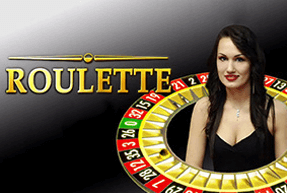

In [30]:

img

In [32]:
type(img)

PIL.PngImagePlugin.PngImageFile

ValueError: Could not save to JPEG for display

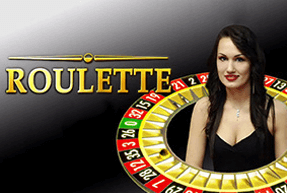

In [33]:
img

In [26]:
with open("a.jpg", "w") as t:
    t.write(download_response.text)

In [18]:
a = re.search(r"(\'data:image/svg+xml;base64,[a-z0-9A-Z]+\')", requests.get(a).text)
